# Analyzing Current Company Data

<font color='red'>
    <b>Note: All business insights result from analysis are written in <font color= 'blue'>BLUE</b>

## Sales:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data Loading
Calendar = pd.read_excel('PCW15 D Calendar.xlsx',  parse_dates=True)
Items = pd.read_excel('PCW15 D Items.xlsx')
Stores = pd.read_excel('PCW15 D Stores.xlsx')
Warehouse = pd.read_excel('PCW15 D Warehouse.xlsx')
Deliveries = pd.read_excel('PCW15 F Deliveries.xlsx')
Sales = pd.read_excel('PCW15 F Sales.xlsx')

### Volume:

Total units sold 908941


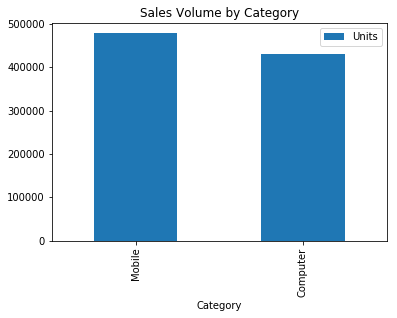

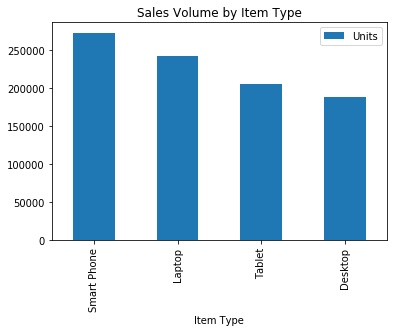

In [12]:
salesitems = pd.merge(Sales, Items, how= 'left', on= 'Item Id')
# Total Items Sold
print('Total units sold', salesitems['Units'].sum())

#By Category
salesitems.groupby('Category').agg({'Units': np.sum}).sort_values(by= 'Units', ascending= False).plot(kind= 'bar')
plt.title('Sales Volume by Category');

# Volume by Item Type:
salesitems.groupby('Item Type').agg({'Units': np.sum}).sort_values(by= 'Units', ascending= False).plot(kind= 'bar')
plt.title('Sales Volume by Item Type');

<font color='blue'>
Volumn wise:
<br>Generally, <b>Mobile</b> category is higher than <b>Computer</b>. 
<br>While <b>Smart Phone</b> shows the highest volumn of all, it is noticeable that <b>Desktop</b> has the lowest among all other item types.

### Revenue:

Total Revenue 556630375.5


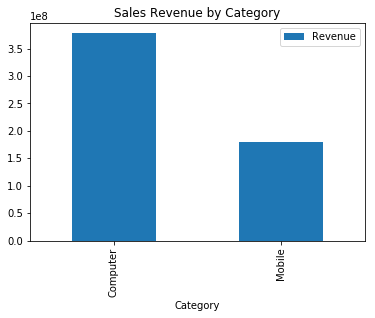

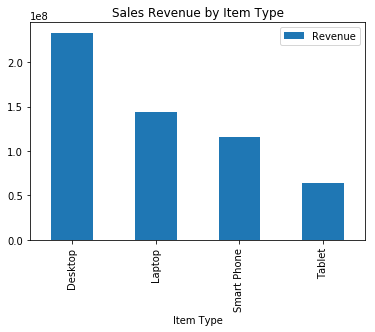

In [13]:
# Total Revenue
print('Total Revenue', salesitems['Revenue'].sum())

# Revenue by Category:
salesitems.groupby('Category').agg({'Revenue': np.sum}).sort_values(by= 'Revenue', ascending= False).plot(kind= 'bar')
plt.title('Sales Revenue by Category');

# Revenue by Item Type:
salesitems.groupby('Item Type').agg({'Revenue': np.sum}).sort_values(by= 'Revenue', ascending= False).plot(kind= 'bar')
plt.title('Sales Revenue by Item Type');

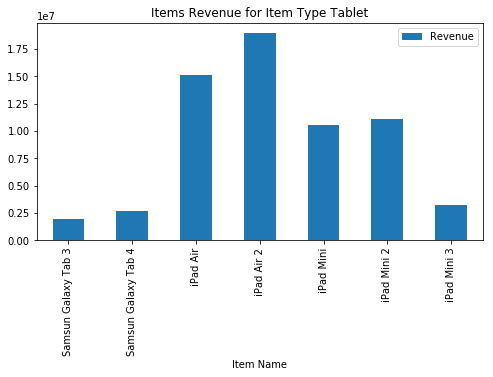

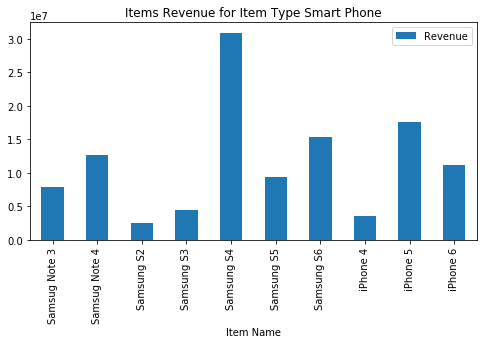

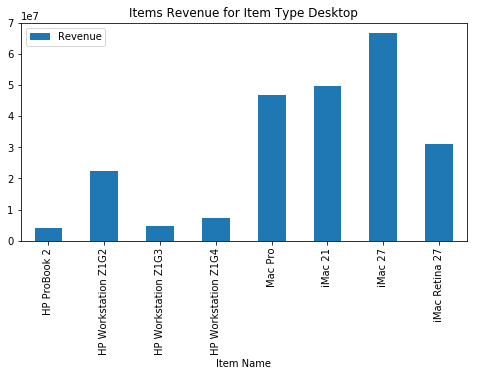

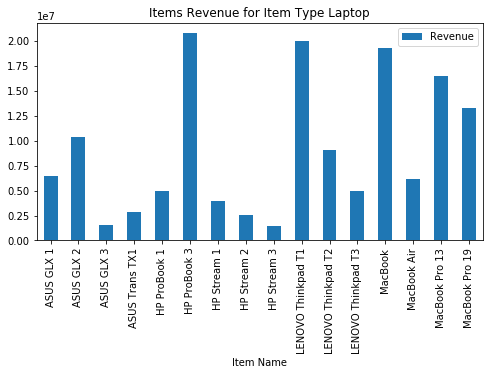

In [52]:
# Item Revenue By Item Type. This shows among each item type, which items are most profitable:

for i in salestrend['Item Type'].unique():
    salestrend[salestrend['Item Type'] == i].groupby(['Item Name']).agg({'Revenue': np.sum}).plot(kind= 'bar', figsize= (8, 4))
    plt.title('Items Revenue for Item Type ' + i);

In [53]:
#PCT of highest 16 items from all 41 items

(salestrend[salestrend['Item Name'].isin(
    ['iPad Air', 'iPdad Air2', 'iPad Mini', 'iPad Mini 2', 'Samsung S4', 'Samsung S6', 'iPhone 5', 'iPhone 6', 
     'iMac 27', 'iMac21', 'Mac Pro','HP ProBook 3', 'LENOVO Thinkpad T1', 'MacBook', 'MacBook Pro 13', 'MacBook Pro 19'])]['Revenue'].sum()/salestrend['Revenue'].sum())*100

56.655209816159235

<font color='blue'>
    We can see that > 55% of revenue comes from 16 items out of 41. We may grow sales of these items more to increase revenue.

### Trends:

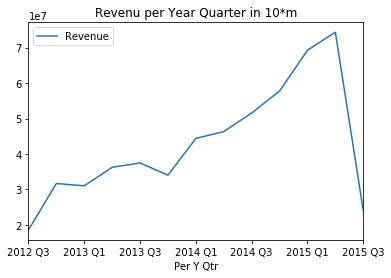

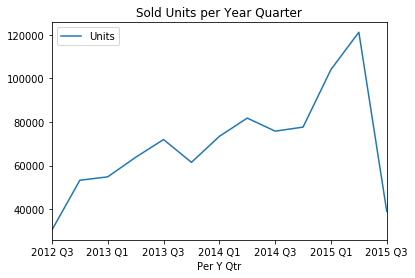

In [68]:
salestrend = salesitems.merge(Calendar[['Day Date', 'D Nm', 'Day in Month',  'Week End', 'Mth Nm', 'Qtr', 'Year', 'Per Y Qtr', 'Per Y Mth#']], how= 'left', left_on= 'Sales Date', right_on='Day Date').drop('Day Date', axis=1)

#Revenue by Quarter
salestrend.groupby('Per Y Qtr').agg({'Revenue': np.sum}).plot(kind= 'line')
plt.title('Revenu per Year Quarter in 10*m');

#Sold Units by Quarter
salestrend.groupby('Per Y Qtr').agg({'Units': np.sum}).plot(kind= 'line')
plt.title('Sold Units per Year Quarter');

<font color='blue'>
In general, there is a dramatic increase in the revenue from one quarter to another. The drop we see in Q3 2015 may not be actual! It just could be insufficient data.

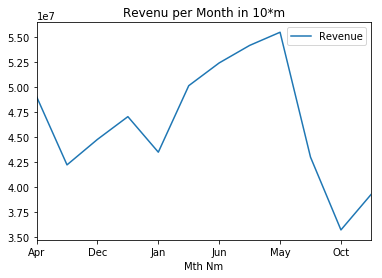

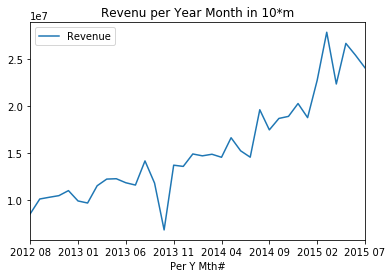

In [66]:
#Revenue by Month
salestrend.groupby('Mth Nm').agg({'Revenue': np.sum}).plot(kind= 'line')
plt.title('Revenu per Month in 10*m');

#Revenue by Year Month
salestrend.groupby('Per Y Mth#').agg({'Revenue': np.sum}).plot(kind= 'line')
plt.title('Revenu per Year Month in 10*m');

<font color='blue'>
    On avergae, the sales performance increases from Jan to May and then dramtically decreases! We may dig deeper to see what could be the reasons! The second graph shows a cyclic decrease after May.<br>
    It is also noticeable that there is a huge decrease on revenue in Nov 2013.

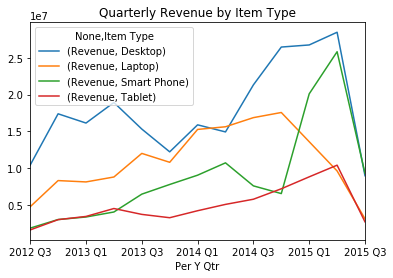

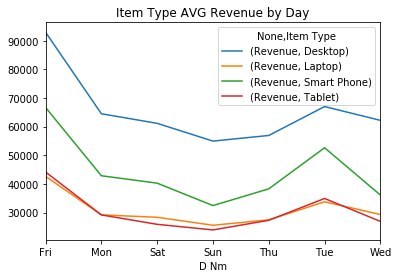

In [26]:
# Trend By Category:
#catqtr = salestrend.groupby(['Per Y Qtr', 'Category']).agg({'Revenue': np.sum}).unstack().plot(kind= 'line')
#plt.title('Quarterly Revenue by Category');

#Trend by Item Type:
catqtr = salestrend.groupby(['Per Y Qtr', 'Item Type']).agg({'Revenue': np.sum}).unstack().plot(kind= 'line')
plt.title('Quarterly Revenue by Item Type');

salestrend.groupby(['D Nm', 'Item Type']).agg({'Revenue': np.mean}).unstack().plot(kind= 'line')
plt.title('Item Type AVG Revenue by Day');

<font color='blue'>
from the above, We can see that both <b>Desktop</b> and <b>Smart Phone</b> are booming since 2014 Q2 and Q4 respectively. <br>While <b>Laptop</b> and <b>Tablets</b> Revenue is slowing down after Q4 2014.<br>
Daily wise, People tend to buy during Fridays and Tuesdays but much lower in Sundays. This helps to set campaigns timing correctly.

### Stores Performance

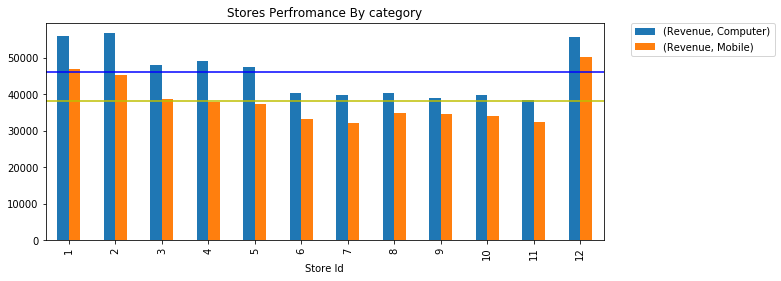

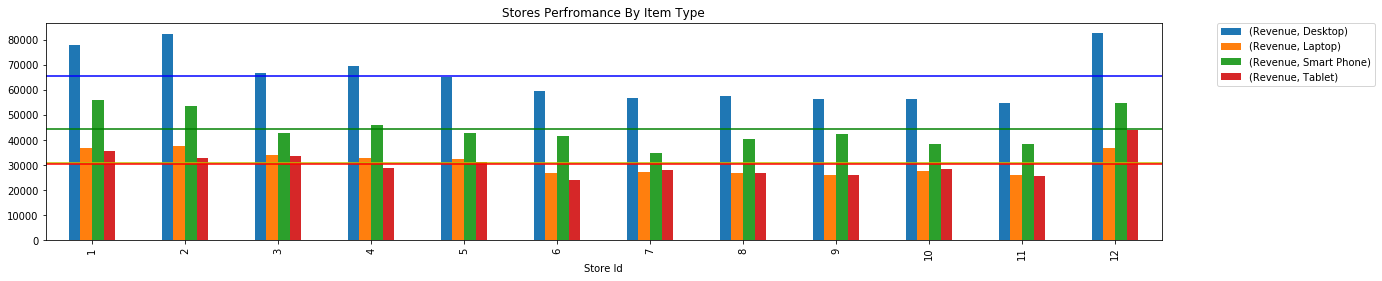

In [27]:
#Stores Perfromance By category
salestrend.groupby(['Store Id', 'Category']).agg({'Revenue': np.mean}).unstack().plot(kind= 'bar', figsize= (10, 4));
col= 'by'
for pos,val in enumerate(salestrend.groupby(['Category']).agg({'Revenue': np.mean})['Revenue'].sort_values(ascending= False)):
    plt.hlines(val, -1, 12, colors= col[pos], linestyles='solid')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Stores Perfromance By category');

#Stores Perfromance By Item Type
salestrend.groupby(['Store Id', 'Item Type']).agg({'Revenue': np.mean}).unstack().plot(kind= 'bar', figsize= (20, 4));
col= 'bgyr'
for pos,val in enumerate(salestrend.groupby(['Item Type']).agg({'Revenue': np.mean})['Revenue'].sort_values(ascending= False)):
    plt.hlines(val, -1, 12, colors= col[pos], linestyles='solid')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Stores Perfromance By Item Type');

<font color= 'blue'>
    Store 6 to 11 are generally underperfroming, while Store 1,2 and 12 are over perfroming in all categories / item types. <br>We may need to review the sale process in the underperfroming stores!

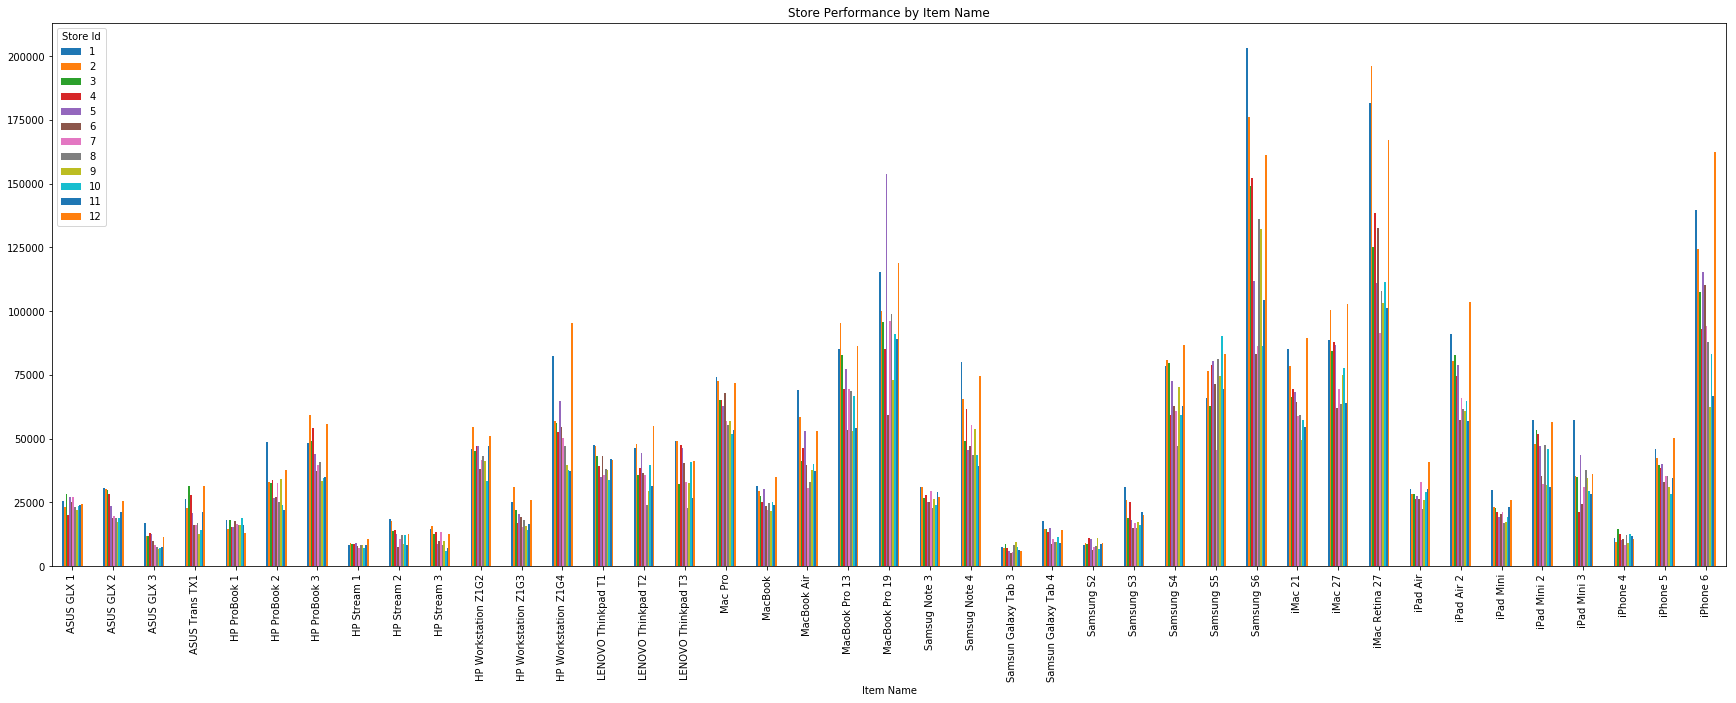

In [35]:
rev_str_itm = salesitems.groupby(['Store Id', 'Item Name']).agg({'Revenue': [np.mean]})
rev_str_itm1 = rev_str_itm.unstack()
rev_str_itm1.columns = rev_str_itm1.columns.droplevel([0,1])

# Item Performance by Store
rev_str_itm1.transpose().plot(kind= 'bar', figsize= (30,10))
plt.title('Store Performance by Item Name');

<font color= 'blue'>
We can cleary see that:<br>
    
- Samsung S6 is highly performing on Stores 1,2 & 12 but low perfroming on Store 5.
- iPhone 6 is highly performing on Store 1 & 12 while low performing on Store 9.
- iMac Retina 27 is highly perfroming on Store 1, 2 & 12 and lowe performing on Store 5
- MacBook Por 19 is highly performing on Store 5